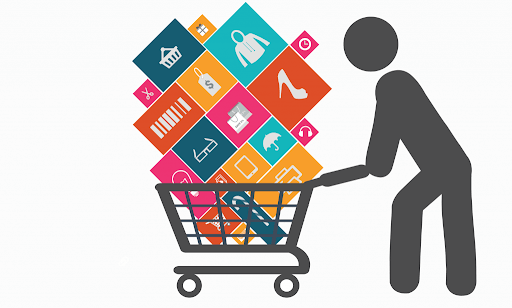

### <span style="color:DarkCyan;">Introduction</span>

The online retail sector is an evolution of the way trade is now carried out. Consumers today have the opportunity to make their purchases using electronic devices connected to the internet, without their physical presence in the store from which they wish to buy products. In particular, the spread of the internet and the increasing access that consumers have to it have increased the percentages of online sales worldwide. In fact, the level of online shopping is increasing significantly every year, with forecasts showing that it will prevail over live markets carried out in the traditional way.
 
These companies therefore need to better understand customer data in all aspects. Identifying similarities and differences between customers, predicting their behavior and therefore suggesting better or perhaps more appropriate choices and opportunities, have become cornerstones in maintaining customer loyalty as well as developing their relationship with the company. 
 
Data from an online retail company were used in conjunction with the RFM (recency, frequency, monetary) and K-Means model to improve segmentation and thus satisfy customers through their best service. The data contains 542 thousand transactions over 1 year and 8 days (1/12/2010 to 9/12/2011). They contain the code and date of each transaction, the description of the products, the quantity of products in the order, the value of each product, the code of each customer and finally his country of origin. 


### <span style="color:DarkCyan;">Objective </span>

The aim is to segment customers using an RFM model and in combination with the k-means method to determine which customers are 'loyal' and contribute to maximizing the company's profit.
 
Consequently, the aim is to create clusters and implement effective marketing strategies in each of these clusters.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#from feature_engine.outlier_removers import Winsorizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#to arrange the decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

/kaggle/input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx


* Step 1 : Data inspection and preprocessing( Data cleaning-transformation)
* Step 2 : EDA
* Step 3 : Clustering Methods( RFM and KMeans)
* Step 4 : Results

In [37]:
#Loading Data
xls = pd.ExcelFile('../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx')
df = pd.read_excel(xls,'Year 2010-2011')

### Step 1.1. : Data inspection

In [38]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [39]:
#Understanding Data
def inspection(df):
    observations = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    minimum = df.min()
    unique = df.apply(lambda x: x.unique().shape[0])
    missing_values = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)
    cols = ['types','No of instances', 'min','unique values', 'missing_values']
    str = pd.concat([types,counts,minimum,unique,missing_values],axis = 1, sort=True)
    str.columns = cols
    print('_________________\nData types:')
    print(str.types.value_counts())
    print('_________________')
    return str

summary=inspection(df)
display(summary.sort_values(by= 'missing_values',ascending = False))

Data shape: (541910, 8)
_________________
Data types:
object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
_________________


,types,No of instances,min,unique values,missing_values
Customer ID,float64,406830,12346.00,4373,135080
Description,object,540456,NaN,4224,1454
Country,object,541910,Australia,38,0
Invoice,object,541910,NaN,25900,0
InvoiceDate,datetime64[ns],541910,2010-12-01 08:26:00,23260,0
Price,float64,541910,-11062.06,1630,0
Quantity,int64,541910,-80995,722,0
StockCode,object,541910,NaN,4070,0


We can observe that:
* Null values : Customer ID and Description contain missing values
* Negative values : Quantity and Price contain negative values. Odd, right?

In [40]:
df.describe()

,Quantity,Price,Customer ID
count,541910.00,541910.00,406830.00
mean,9.55,4.61,15287.68
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [41]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [42]:
#Percent of missing values in each column
cols=df.columns
k=[]
for col in cols:
    l='{:3.2%}'.format(df[(df[ col].isnull())].shape[0]/df.shape[0])
    k.append(l)
missing=pd.DataFrame(k,index=cols,columns=['% of missing values'])
missing


,% of missing values
Invoice,0.00%
StockCode,0.00%
Description,0.27%
Quantity,0.00%
InvoiceDate,0.00%
Price,0.00%
Customer ID,24.93%
Country,0.00%


In [43]:
#Percent of negative values
df_neg=df[['Quantity','Price']]
cols=df_neg.columns
z=[]
u='{:3.2%}'.format(df[(df.Quantity<0)].shape[0]/df.shape[0])
a='{:3.4%}'.format(df[(df.Price<0)].shape[0]/df.shape[0])
z.append(u)
z.append(a)
negative=pd.DataFrame(z,index=cols,columns=['% of negative values'])
negative
  

,% of negative values
Quantity,1.96%
Price,0.0004%


### Step 1.2. : Data Cleaning

In [44]:
#Let's get rid of the Customer ID null values
df=df[~(df['Customer ID'].isnull())]

In [45]:
# Drop negative value with/or return transaction (Unit Price < 0)
df = df[~(df.Quantity<0)]
df = df[df.Price>0]

In [46]:
#Let's check again
inspection(df)

Data shape: (397885, 8)
_________________
Data types:
object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
_________________


,types,No of instances,min,unique values,missing_values
Country,object,397885,Australia,37,0
Customer ID,float64,397885,12346.00,4338,0
Description,object,397885,4 PURPLE FLOCK DINNER CANDLES,3877,0
Invoice,object,397885,536365,18532,0
InvoiceDate,datetime64[ns],397885,2010-12-01 08:26:00,17282,0
Price,float64,397885,0.00,440,0
Quantity,int64,397885,1,301,0
StockCode,object,397885,NaN,3665,0


### Step 2. : EDA

RFM_analysis


In [47]:
df['Total_price']=df['Quantity'] * df['Price']
#RECENCY

import datetime as dt
today_date=dt.datetime(2011,12,10)
rec_df=today_date-df.groupby("Customer ID").agg({"InvoiceDate":max})
rec_df.rename(columns={"InvoiceDate": "Recency"}, inplace=True)
rec_df=rec_df["Recency"].apply(lambda x: x.days)

#FREQUENCY

freq_df=df.groupby("Customer ID").agg({"InvoiceDate":"nunique"})
freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace=True)

#MONETARY
monetary_df=df.groupby("Customer ID").agg({"Total_price":"sum"})
monetary_df.rename(columns={"Total_price":"Monetary"}, inplace=True)

rfm=pd.concat([rec_df,freq_df, monetary_df], axis=1)
rfm.head(50)


,Recency,Frequency,Monetary
Customer ID,,,
12346.00,325,1,77183.60
12347.00,2,7,4310.00
12348.00,75,4,1797.24
12349.00,18,1,1757.55
12350.00,310,1,334.40
12352.00,36,8,2506.04
12353.00,204,1,89.00
12354.00,232,1,1079.40
12355.00,214,1,459.40


K-Means

In [48]:
rfmk=rfm.copy()

In [49]:
#SKEWNESS
rfmk.skew()

Recency      1.25
Frequency   12.28
Monetary    19.32
dtype: float64

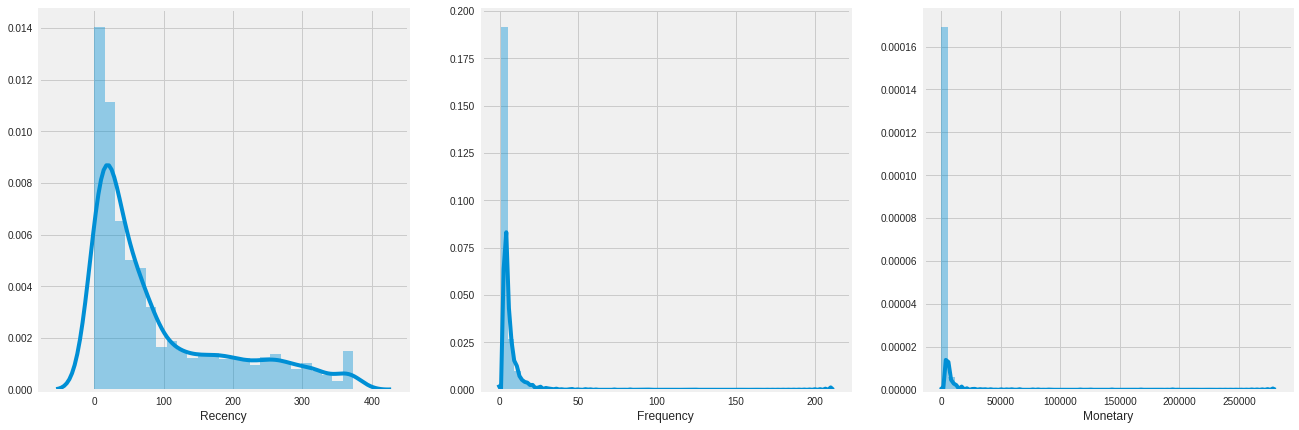

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(20,7))
sns.distplot(rfmk['Recency'], ax=ax[0])
sns.distplot(rfmk['Frequency'], ax=ax[1])
sns.distplot(rfmk['Monetary'], ax=ax[2]);

In [51]:
# Log transformation

rfmk['Recency']=np.log1p(rfmk['Recency'])
rfmk['Frequency']=np.log1p(rfmk['Frequency'])
rfmk['Monetary']=np.log1p(rfmk['Monetary'])

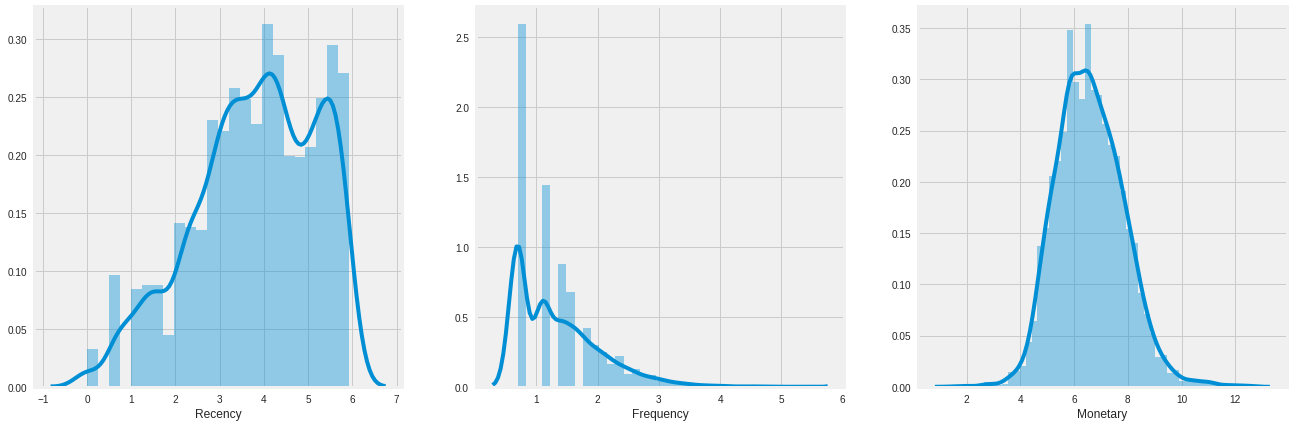

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(20,7))
sns.distplot(rfmk['Recency'], ax=ax[0])
sns.distplot(rfmk['Frequency'], ax=ax[1])
sns.distplot(rfmk['Monetary'], ax=ax[2]);

In [53]:
rfmk.head(3)

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,5.79,0.69,11.25
12347.00,1.10,2.08,8.37
12348.00,4.33,1.61,7.49


In [54]:
rfmk.isna().any()

Recency      False
Frequency    False
Monetary     False
dtype: bool

In [55]:
# Scaling

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(rfmk)
normalized=transformer.transform(rfmk)
normalized_rfm=pd.DataFrame(normalized,columns=rfm.columns)
normalized_rfm.head()

,Recency,Frequency,Monetary
0,0.46,0.05,0.89
1,0.13,0.24,0.96
2,0.49,0.18,0.85
3,0.37,0.09,0.93
4,0.70,0.08,0.71


In [56]:
rfmk.skew()

Recency     -0.47
Frequency    1.20
Monetary     0.39
dtype: float64

In [57]:
normalized_rfm.head()

,Recency,Frequency,Monetary
0,0.46,0.05,0.89
1,0.13,0.24,0.96
2,0.49,0.18,0.85
3,0.37,0.09,0.93
4,0.70,0.08,0.71


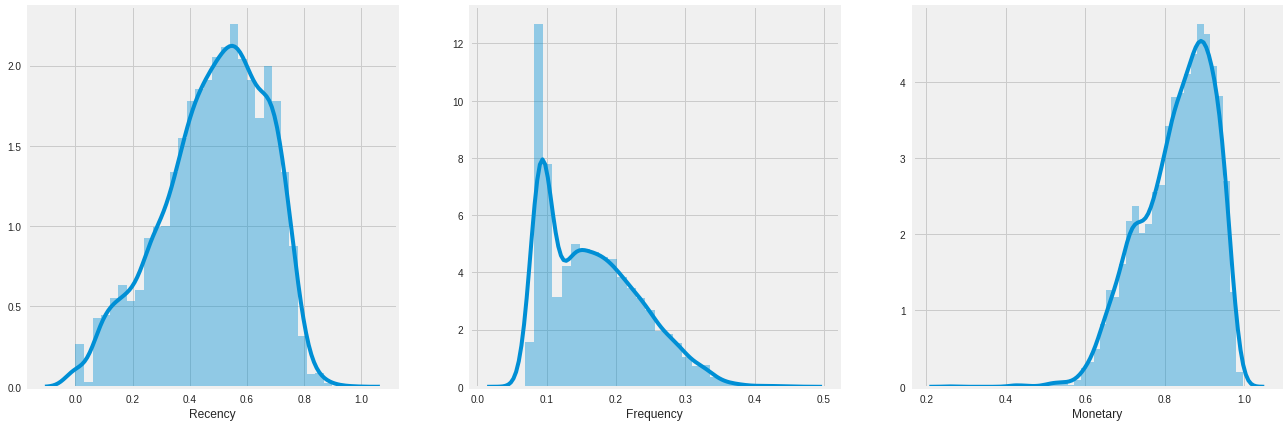

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(20,7))
sns.distplot(normalized_rfm['Recency'], ax=ax[0])
sns.distplot(normalized_rfm['Frequency'], ax=ax[1])
sns.distplot(normalized_rfm['Monetary'], ax=ax[2]);

In [59]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

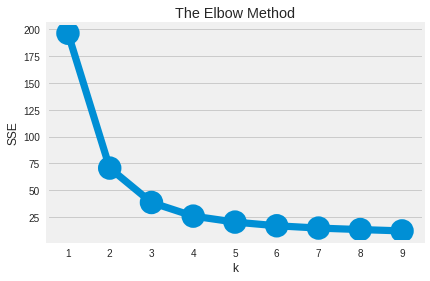

In [60]:
#optimum k

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_rfm)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

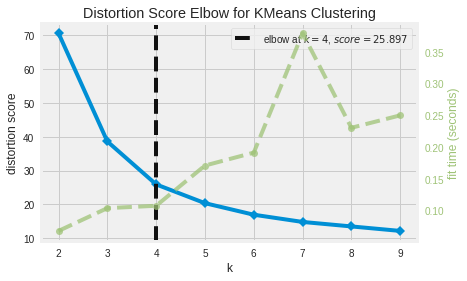

In [61]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visu=KElbowVisualizer(kmeans, k=(2,10))
visu.fit(normalized_rfm)
visu.poof()

In [62]:
# K=4 is the optimal choice

k_means = KMeans(n_clusters =4).fit(normalized_rfm)
segments=k_means.labels_
segments

array([0, 2, 0, ..., 1, 2, 1], dtype=int32)

In [63]:
print(segments.shape)
print(normalized_rfm.shape)

(4338,)
(4338, 3)


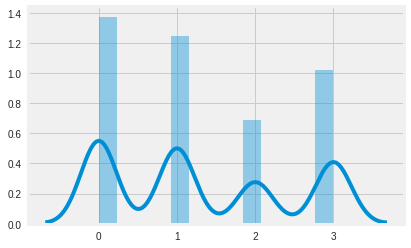

In [64]:
sns.distplot(segments);

In [65]:
normalized_rfm["Segments"] = k_means.labels_
normalized_rfm.head(3)

,Recency,Frequency,Monetary,Segments
0,0.46,0.05,0.89,0
1,0.13,0.24,0.96,2
2,0.49,0.18,0.85,0


In [66]:
# To analyze well

S=pd.DataFrame(normalized_rfm["Segments"])
S=S.reset_index(drop=True)
rfm=rfm.reset_index(drop=True)
df_all=pd.concat([rfm, S], axis=1)
df_all.head(10)

,Recency,Frequency,Monetary,Segments
0,325,1,77183.60,0
1,2,7,4310.00,2
2,75,4,1797.24,0
3,18,1,1757.55,1
4,310,1,334.40,3
5,36,8,2506.04,1
6,204,1,89.00,3
7,232,1,1079.40,0
8,214,1,459.40,3
9,22,3,2811.43,1


Reporting

In [67]:
df_all[["Segments","Recency","Frequency","Monetary"]].groupby("Segments").agg(["mean"])

,Recency,Frequency,Monetary
,mean,mean,mean
Segments,,,
0,89.31,2.17,821.99
1,28.42,4.77,1971.41
2,5.03,11.89,7321.07
3,232.22,1.27,259.42


In [68]:
df_all[["Segments","Recency","Frequency","Monetary"]].groupby("Segments").agg(["min","max","mean","count"])

Recency                   Frequency                  Monetary  \
             min  max   mean count       min  max  mean count      min   
Segments                                                                 
0             14  372  89.31  1375         1   33  2.17  1375    35.40   
1              3  235  28.42  1250         1   39  4.77  1250    41.99   
2              0   38   5.03   690         1  210 11.89   690   124.20   
3             22  373 232.22  1023         1    6  1.27  1023     3.75   

                                  
               max    mean count  
Segments                          
0         77183.60  821.99  1375  
1         44534.30 1971.41  1250  
2        280206.02 7321.07   690  
3          1141.24  259.42  1023

In [69]:
df_all[["Segments","Recency","Frequency","Monetary"]].groupby("Segments").agg(["mean","count"])

Recency       Frequency       Monetary      
            mean count      mean count     mean count
Segments                                             
0          89.31  1375      2.17  1375   821.99  1375
1          28.42  1250      4.77  1250  1971.41  1250
2           5.03   690     11.89   690  7321.07   690
3         232.22  1023      1.27  1023   259.42  1023

### **Segment 0**

**There are 1248 customers in this group.**

* Their last purchases were 28.5 days ago, meanly.
* The frequency of the group's purchase mean is 4.76 items.
* The mean of the total purchase for one person who is in this group is ~1958 sterlin.

### **Segment 1**

**There are 1026 customers in this group.**

* Their last purchases were 232 days ago, meanly.
* The frequency of the group's purchase mean is 1.3.
* The mean of the total purchase for one person who is in this group is 260 sterlin.

### **Segment 2**

**There are 692 customers in this group.**

* Their last purchases were 5 days ago, meanly.
* The frequency of the group's purchase mean is 12.
* The mean of the total purchase for one person who is in this group is 7330 sterlin.

### **Segment 3**

**There are 1372 customers in this group.**

* Their last purchases were 89 days ago, meanly.
* The frequency of the group's purchase mean is 2.17.
* The mean of the total purchase for one person who is in this group is 822 sterlin.
